# <span style="color:orange; font-family:PT Sload_datasetrting Packages </span>

In [2]:
%reload_ext autoreload
%autoreload 2

# import os
# os.environ["CUDA_VISIBLE_DEVICES"]="0"
from crowd_certain.utilities.utils import AIM1_3
from crowd_certain.utilities.dataset_loader import aim1_3_read_download_UCI_database

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%aimport crowd_certain.utilities.utils


In [3]:
sns.set_theme(font_scale=1.1, palette='colorblind', style='darkgrid', context='paper')

# <span style="color:orange; font-family:PT Sans Narrow; font-size:1em"> 1 Loading the Data </span>

In [5]:
# dataset_dict = {1:'kr-vs-kp',
#                 2:'mushroom',
#                 3:'iris',
#                 4:'spambase',
#                 5:'tic-tac-toe',
#                 6:'sick',
#                 7:'waveform',
#                 8:'car',
#                 9:'vote',
#                 10:'ionosphere'}

config = utils.reading_user_input_arguments(jupyter=True, dataset_name='mushroom', read_mode='read_arff')
np.random.seed(0)
data, feature_columns = load_data.aim1_3_read_download_UCI_database(
    config)  # mode='read'


# <span style="color:orange; font-family:PT Sans Narrow; font-size:1em"> 2. Tables for single database </span>

In [6]:
aim1_3_jn_da = utils.Aim1_3_Data_Analysis_Results(config=config, re_plot=True, data=data, feature_columns=feature_columns )

## <span style="font-family:PT Sans Narrow; font-size:em; color:green"> 2.1 Calculating the accuracy for proposed & benchmarks  </span>

In [7]:
# LOAD_OLD_PARAMS = ( MLFLOW_MODE in ('LOADING_OLD_SIMULATION' , 'RE_RUNNING_OLD_SIMULATION') )
# aim1_3_jn_da.get_parameters(run=N, params_source='default', log_params=False)

utils.AIM1_3.get_outputs(config=config, data=data,
                         feature_columns=feature_columns)


defaultdict(list,
            {'NL3': [{'F': {'freq': {'proposed':       truth     P_pos     P_neg         F
                 0         1  0.667820  0.332180  0.667820
                 7         0  0.332180  0.667820  0.667820
                 21        1  0.339251  0.660749  0.660749
                 24        0  0.332180  0.667820  0.667820
                 25        1  0.667820  0.332180  0.667820
                 ...     ...       ...       ...       ...
                 8098      1  0.667820  0.332180  0.667820
                 8103      0  0.332180  0.667820  0.667820
                 8106      0  0.332180  0.667820  0.667820
                 8110      0  0.332180  0.667820  0.667820
                 8121      0  0.332180  0.667820  0.667820
                 
                 [1625 rows x 4 columns],
                 'proposed_penalized':       truth     P_pos     P_neg         F
                 0         1  0.989557  0.010443  0.989557
                 7         0  0.010443  0.

## <span style="font-family:PT Sans Narrow; font-size:em; color:green"> 2.2 Estimated weights </span>

In [8]:
weights = aim1_3_jn_da.get_weights(worker_index=-1, seed_ix=0)

## <span style="font-family:PT Sans Narrow; font-size:em; color:green"> 2.3 Showing the results for each seed </span>

In [9]:
aim1_3_jn_da.avg_accuracy_over_all_seeds()

In [10]:
aim1_3_jn_da.accuracy_seeds['freq'][f'NL{aim1_3_jn_da.nlabelers_list[-1]}'].round(decimals=2)

,proposed,proposed_penalized,Tao,Sheng,MV_Classifier,GoldMajorityVote,MajorityVote,MMSR,Wawa,ZeroBasedSkill,GLAD,DawidSkene
seed_num,,,,,,,,,,,,
0,0.98,0.99,0.96,0.96,0.96,0.72,0.68,0.83,0.68,0.68,0.81,0.80
1,0.98,0.98,0.97,0.97,0.97,0.78,0.78,0.84,0.78,0.78,0.84,0.84
2,0.99,0.99,0.97,0.97,0.97,0.95,0.90,0.98,0.93,0.94,0.98,0.98
3,0.99,0.99,0.99,0.99,0.99,1.00,0.98,1.00,1.00,1.00,1.00,1.00
4,0.99,0.99,0.99,0.99,0.99,0.96,0.95,0.98,0.96,0.96,0.98,0.98
5,0.99,0.99,0.98,0.98,0.98,0.92,0.87,0.97,0.90,0.91,0.97,0.97


## <span style="font-family:PT Sans Narrow; font-size:em; color:green"> 2.4 Final results—average over all seeds </span>

In [11]:
aim1_3_jn_da.accuracy['freq'].round(decimals=2)

,proposed,proposed_penalized,Tao,Sheng,MV_Classifier,GoldMajorityVote,MajorityVote,MMSR,Wawa,ZeroBasedSkill,GLAD,DawidSkene
nlabelers,,,,,,,,,,,,
NL3,0.98,0.98,0.97,0.97,0.97,0.80,0.80,0.87,0.80,0.80,0.80,0.79
NL4,0.98,0.98,0.98,0.96,0.97,0.87,0.80,0.88,0.87,0.87,0.87,0.87
NL5,0.98,0.99,0.98,0.98,0.98,0.87,0.84,0.90,0.84,0.84,0.90,0.90
NL6,0.99,0.99,0.98,0.92,0.93,0.89,0.83,0.78,0.89,0.89,0.91,0.91
NL7,0.95,0.99,0.95,0.95,0.95,0.88,0.85,0.92,0.86,0.86,0.91,0.91
NL8,0.99,0.99,0.98,0.96,0.96,0.90,0.85,0.93,0.90,0.90,0.92,0.93
NL9,0.99,0.99,0.98,0.98,0.98,0.89,0.86,0.93,0.87,0.88,0.93,0.93


# <span style="color:orange; font-family:PT Sans Narrow; font-size:1em"> 3. Figures </span>

## <span style="font-family:PT Sans Narrow; font-size:em; color:green"> 3.1 Comparing the proposed METHODS  </span>

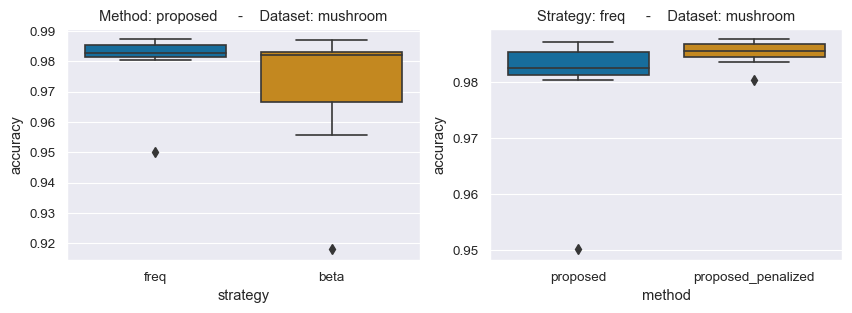

In [12]:
aim1_3_jn_da.plot_new_comparing_proposed_methods(re_plot=True)

In [13]:
aim1_3_jn_da.accuracy['freq'][['proposed','proposed_penalized']]

,proposed,proposed_penalized
nlabelers,,
NL3,0.980513,0.980513
NL4,0.982256,0.983692
NL5,0.982667,0.985436
NL6,0.985436,0.986462
NL7,0.950154,0.985641
NL8,0.987179,0.987692
NL9,0.985538,0.987179


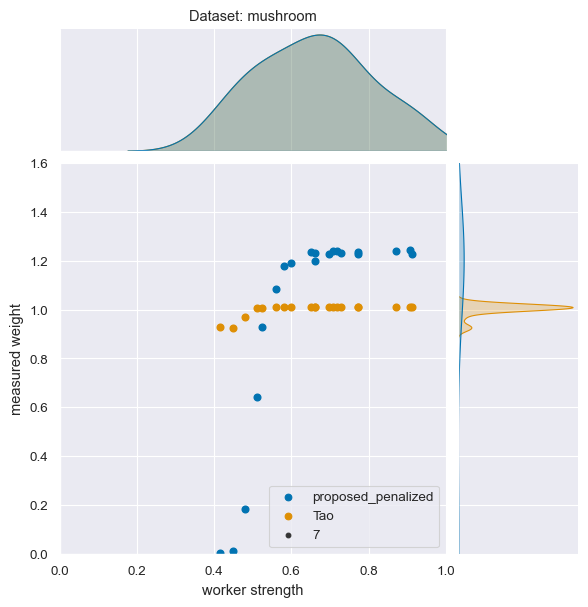

In [14]:
aim1_3_jn_da.plot_new_worker_weight_strength_relation(re_plot=True, smooth=True, seed=1, interpolation_pt_count=1000,  num_labelers=20)

## <span style="font-family:PT Sans Narrow; font-size:em; color:green"> 3.2 Accuracy distribution using kernel density function  </span>

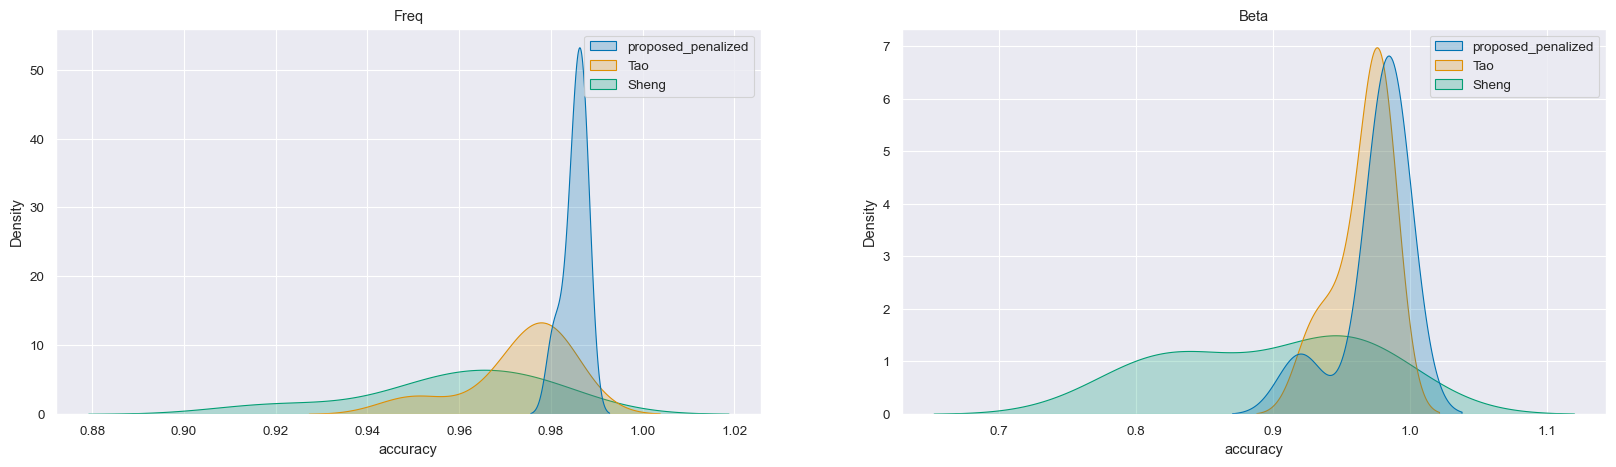

In [15]:
aim1_3_jn_da.plot_new_comparing_proposed_with_Tao_Sheng_MV(re_plot=True)

## <span style="font-family:PT Sans Narrow; font-size:em; color:green"> 3.3 Average accuracies across different technigues for different # of workers  </span>

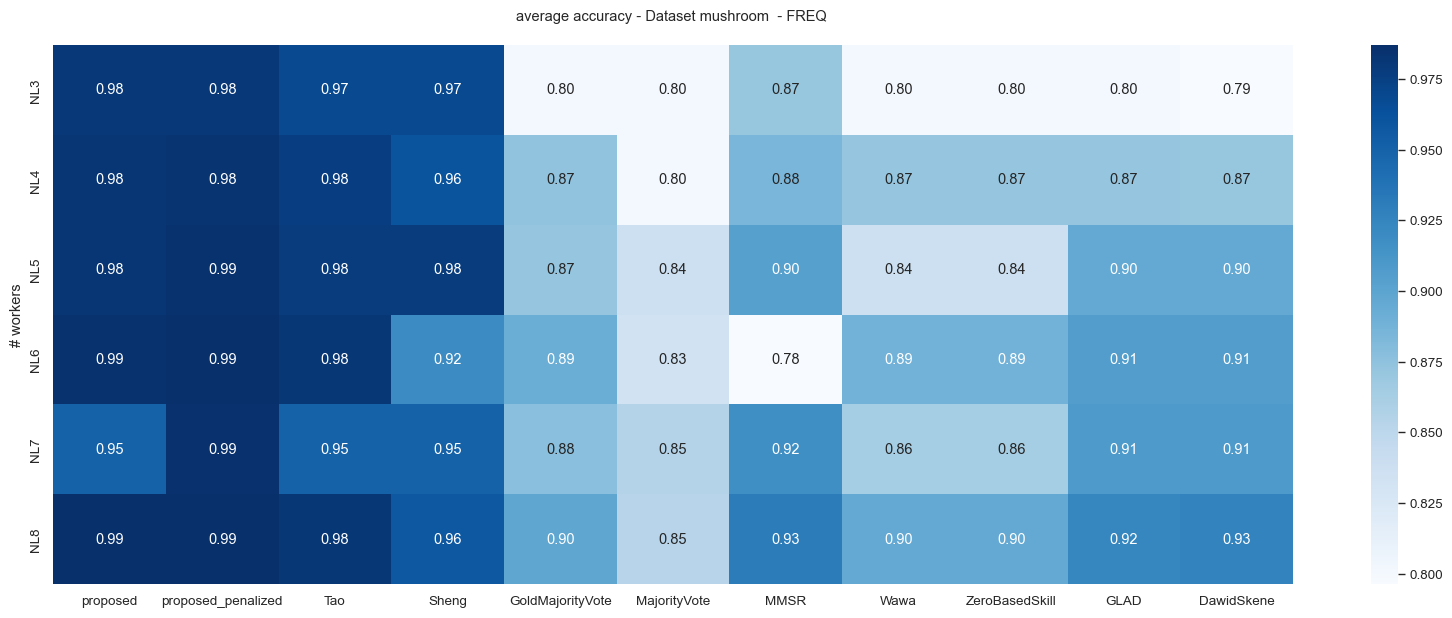

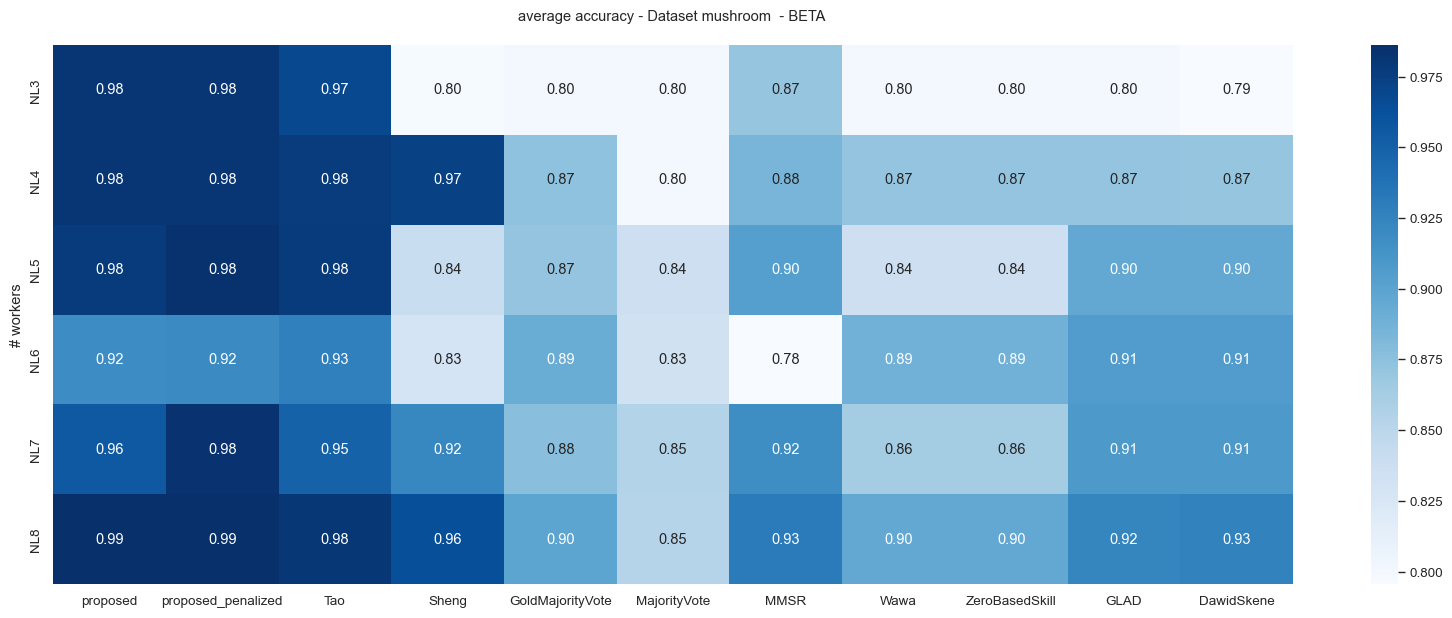

In [16]:
aim1_3_jn_da.plot_new_comparing_proposed_with_all_benchmarks(re_plot=True)

## <span style="font-family:PT Sans Narrow; font-size:em; color:green"> 3.4 Distribution of average accuracies across different technigues for # workers smaller than six   </span>

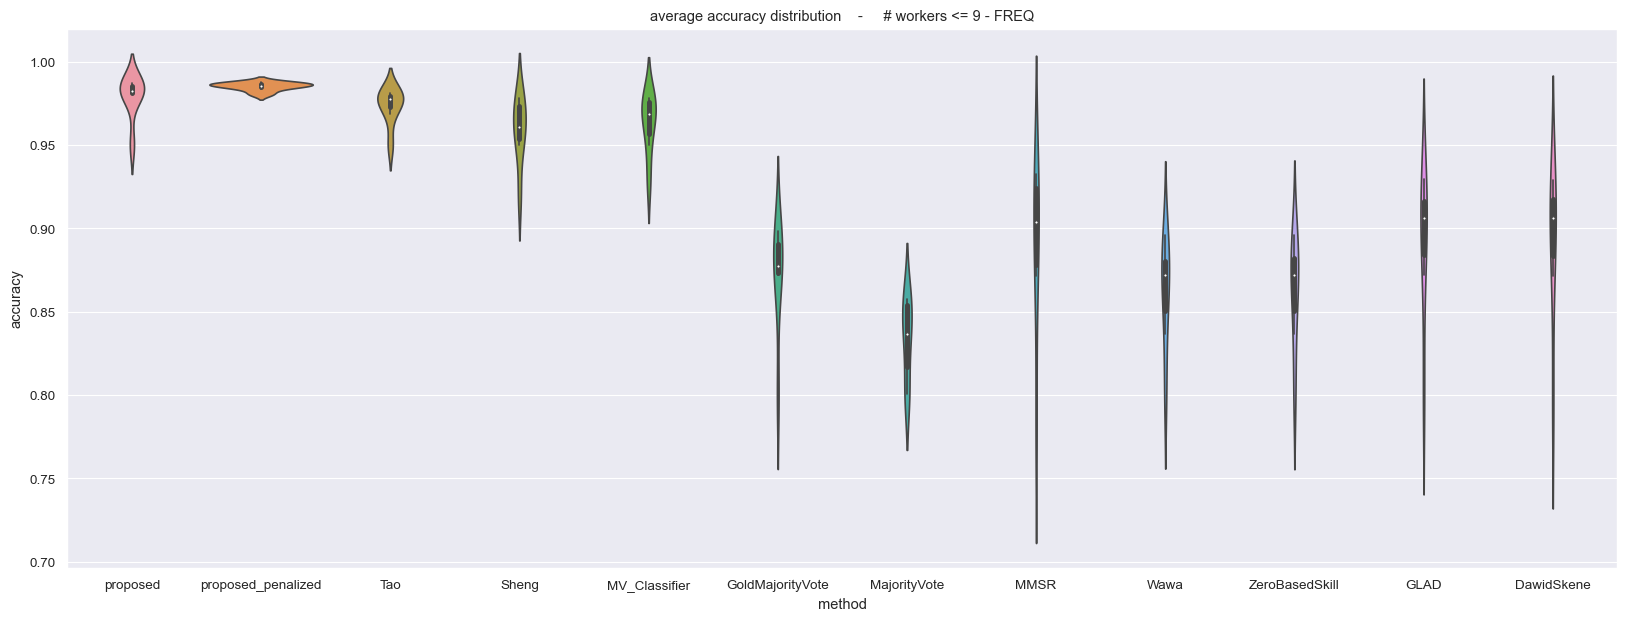

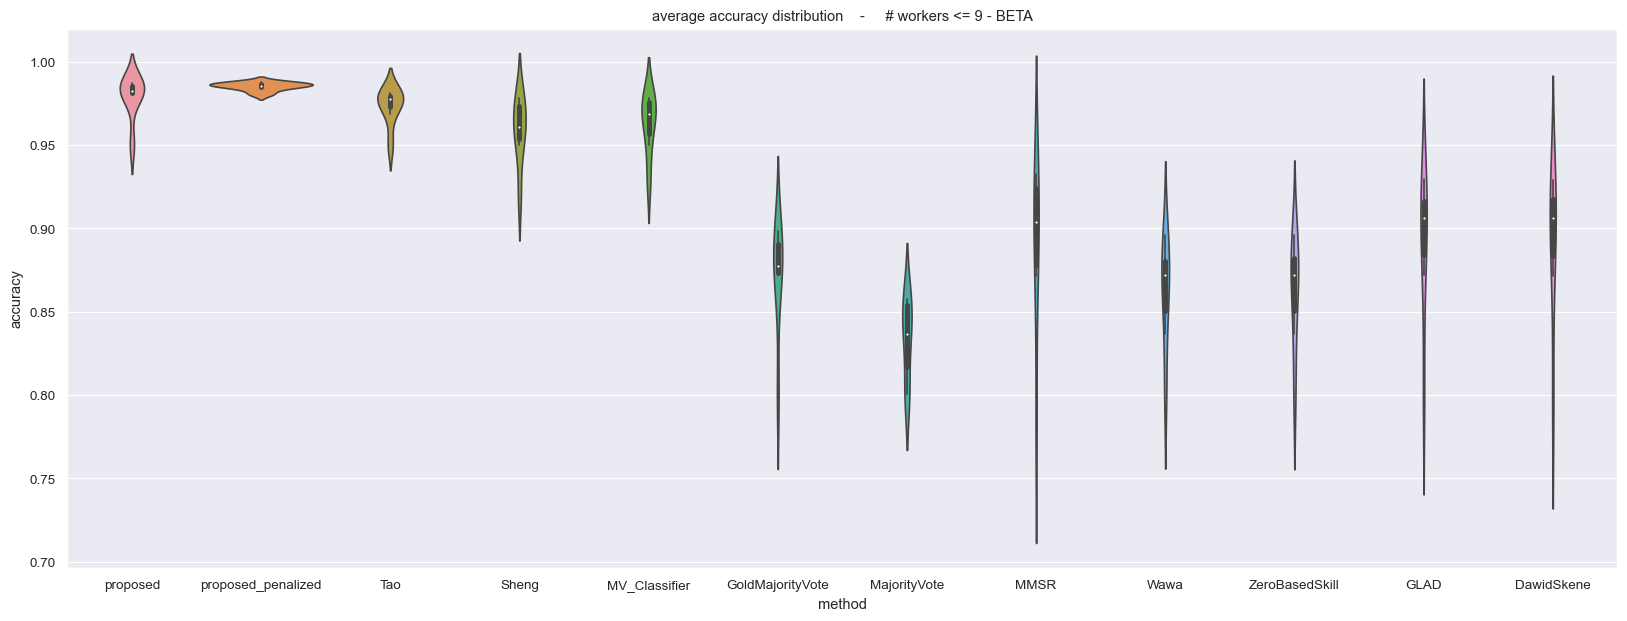

In [17]:
aim1_3_jn_da.plot_new_comparing_proposed_with_all_benchmarks_distribution(re_plot=True)

# <span style="color:orange; font-family:PT Sans Narrow; font-size:1em"> 3. Other Figures </span>

## <span style="font-family:PT Sans Narrow; font-size:em; color:green"> 3.1 Comparing the METHOD 1 & 2  </span>

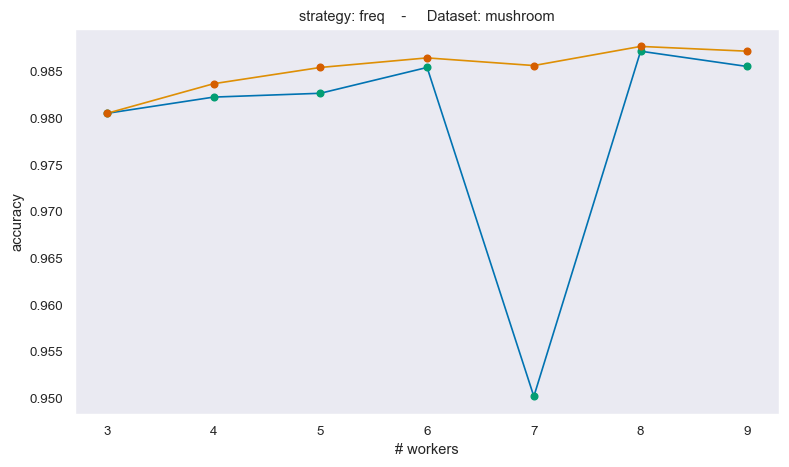

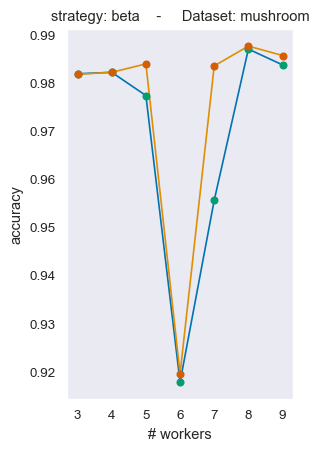

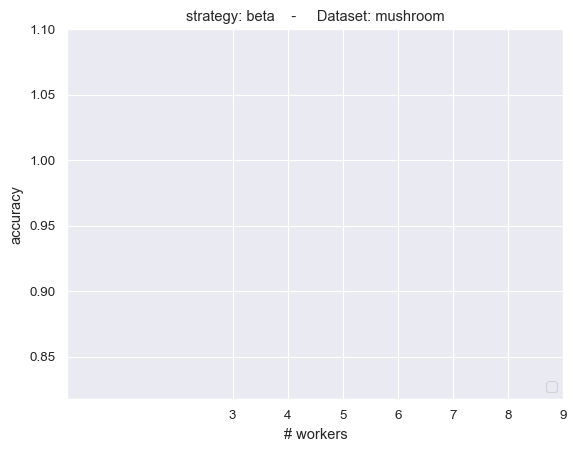

In [18]:
aim1_3_jn_da.plot_comparing_proposed_methods_1_2(re_plot=True, smooth=True)

<Axes: xlabel='nlabelers', ylabel='accuracy'>

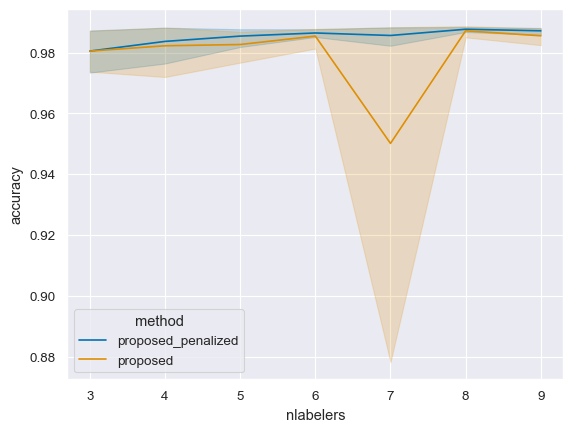

In [19]:
columns = ['seed_num', 'nlabelers', 'proposed_penalized', 'proposed']
df = aim1_3_jn_da.accuracy_seeds_stacked['freq'][columns]
df = df.melt(id_vars=['seed_num', 'nlabelers'], var_name='method', value_name='accuracy')

sns.lineplot(data=df, x='nlabelers', y='accuracy', hue='method', markers=True)

In [20]:
# columns = ['seed_num', 'nlabelers', 'proposed', 'proposed_penalized']

# sns.lineplot(x='nlabelers', y='seed_num' , data=aim1_3_jn_da.accuracy_seeds_stacked['freq'][columns], legend=True)

## <span style="font-family:PT Sans Narrow; font-size:1em; color:green"> 3.2 Comparing the FREQ & BETA  </span>

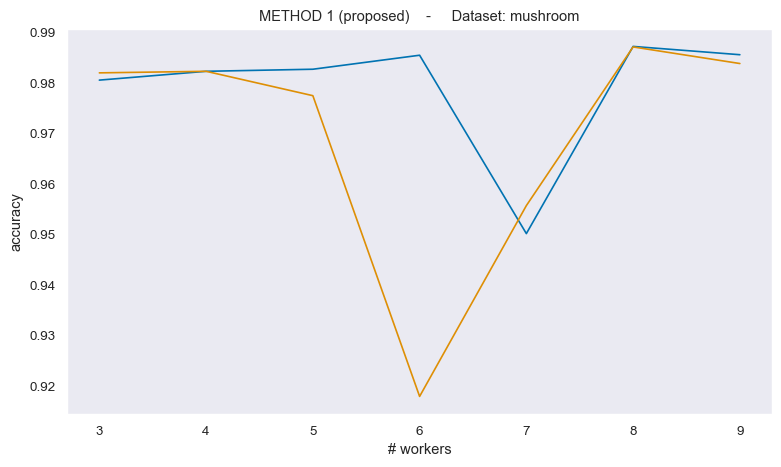

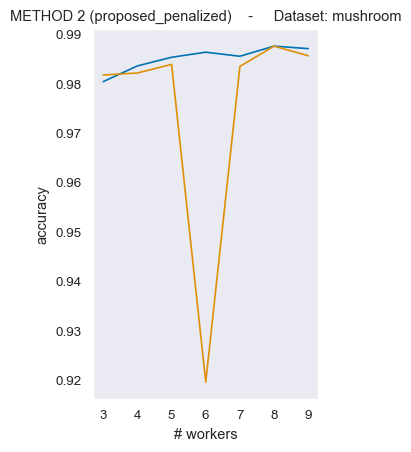

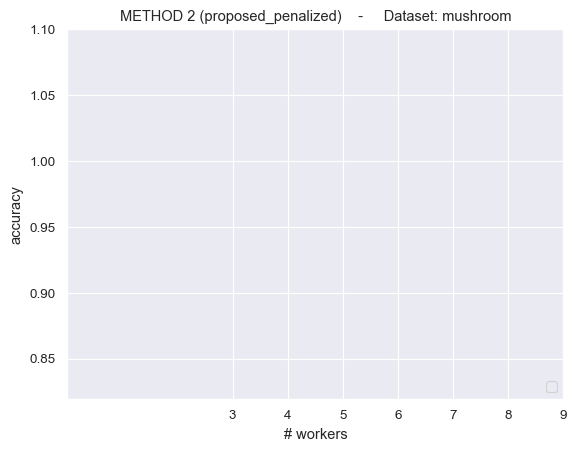

In [21]:
aim1_3_jn_da.plot_comparing_proposed_methods_freq_beta(re_plot=True, smooth=True)

## <span style="font-family:PT Sans Narrow; font-size:1em; color:green"> 3.3 Comparing with Tao & Sheng  </span>

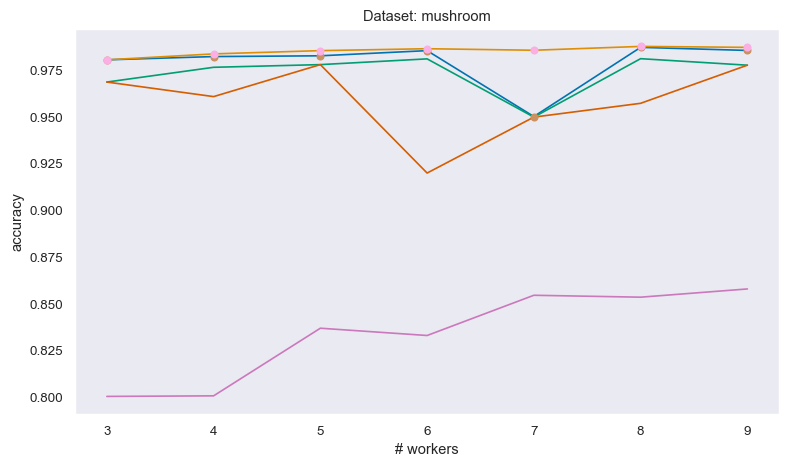

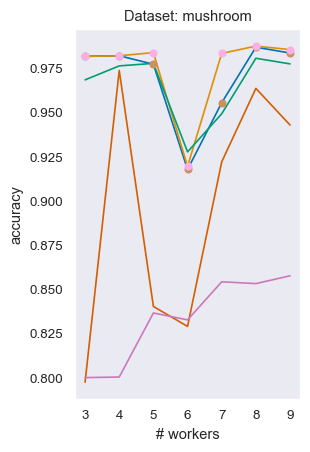

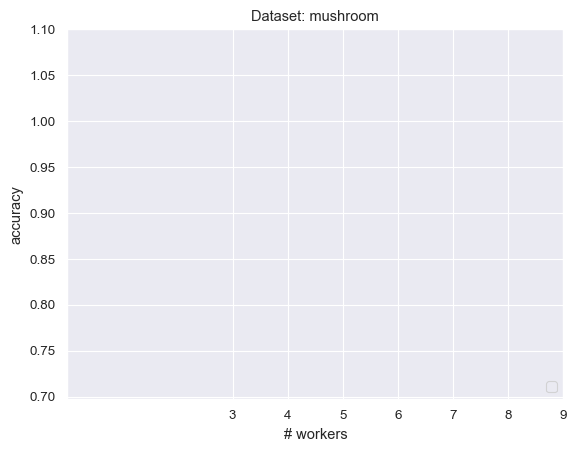

In [22]:
aim1_3_jn_da.plot_comparing_proposed_with_Tao_Sheng_MV(re_plot=True, smooth=True)

## <span style="font-family:PT Sans Narrow; font-size:1em; color:green"> 3.4 FREQ:  Comparing with all benchmarks  </span>

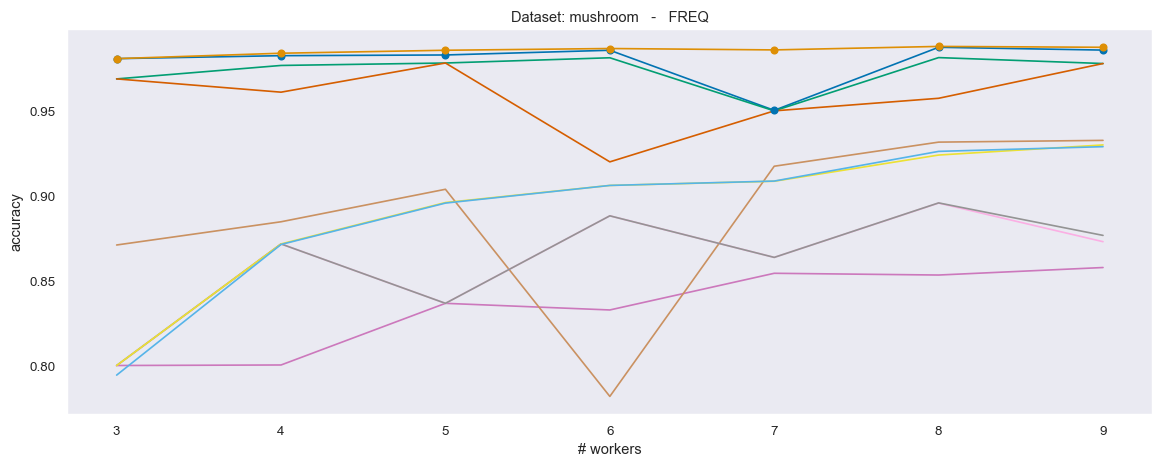

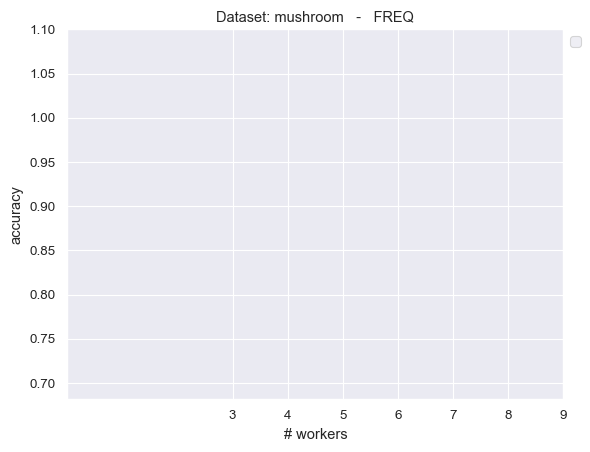

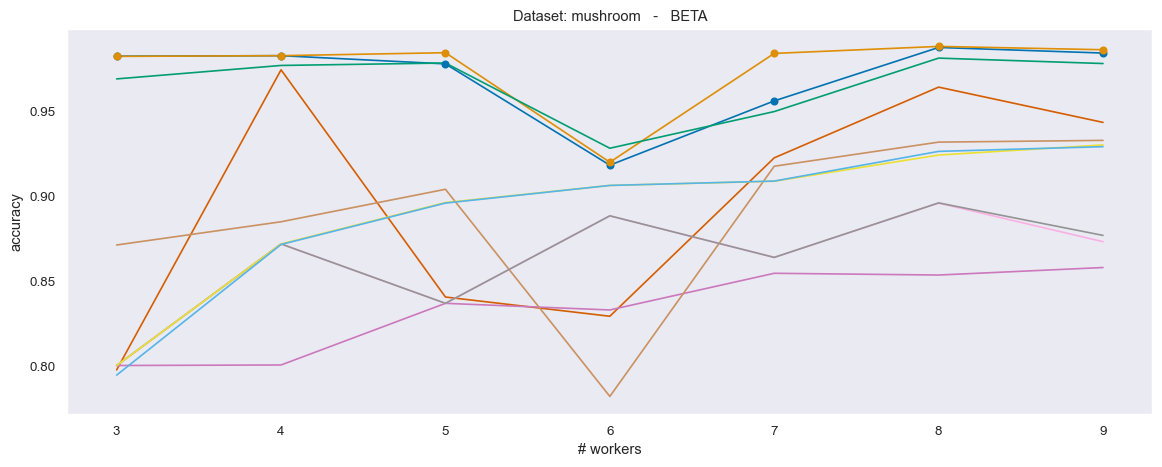

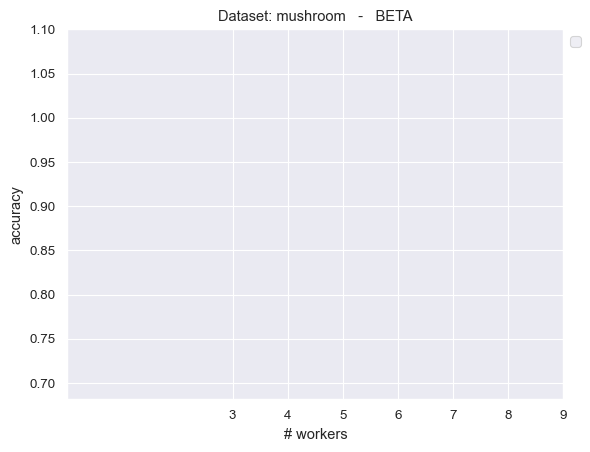

In [23]:
aim1_3_jn_da.plot_comparing_proposed_with_all_benchmarks(re_plot=True, smooth=True)

# <span style="color:orange; font-family:PT Sans Narrow; font-size:1em"> 4. Cool Figures </span>

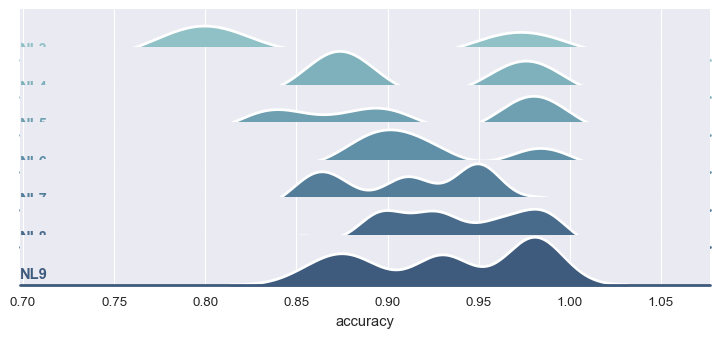

In [24]:
df = aim1_3_jn_da.accuracy_stacked.groupby('strategy').get_group('freq') # ['freq'][ ['seed_num', 'nlabelers', 'proposed_penalized', 'proposed_penalized'] ]
# df = df.melt(id_vars=['seed_num', 'nlabelers'], value_vars=['proposed_penalized', 'proposed_penalized'], var_name='method', value_name='accuracy')

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="nlabelers", hue="nlabelers", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "accuracy", clip_on=False, bw_adjust=.5, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "accuracy", clip_on=False, bw_adjust=.5, color="w", lw=2, )

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "accuracy")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

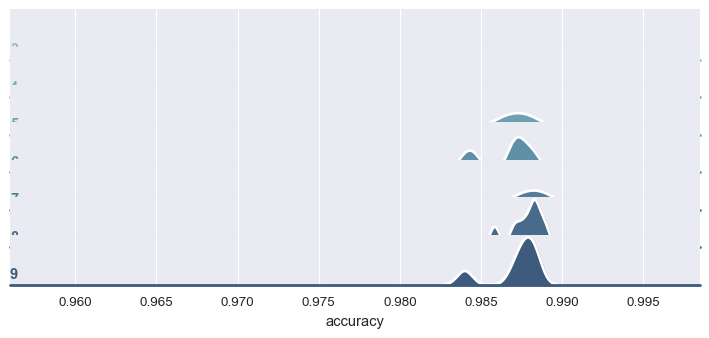

In [25]:
df = aim1_3_jn_da.accuracy_seeds_stacked['freq'][ ['seed_num', 'nlabelers', 'proposed_penalized', 'proposed_penalized'] ]
df = df.melt(id_vars=['seed_num', 'nlabelers'], value_vars=['proposed_penalized', 'proposed_penalized'], var_name='method', value_name='accuracy')

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="nlabelers", hue="nlabelers", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "accuracy",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "accuracy", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "accuracy")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# <span style="color:orange; font-family:PT Sans Narrow; font-size:1em"> Killing mlflow server </span>
```bash
pkill -f mlflow 
```

In [26]:
# closing the child mlflow session
# mlflow_setup.cleanup_mlflow_after_runs()

# closing the ssh session
# mlflow_setup.ssh_session.kill()